In [58]:
import pandas as pd
import os
import sys

In [59]:
%load_ext autoreload


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [60]:
%autoreload 2

In [61]:
path = 'data/Copy of Week2_challenge_data_source(CSV).csv'
print(os.getcwd())
os.chdir('c:/Users/hp/Desktop/tutorial/kaim-week-2/')

c:\Users\hp\Desktop\tutorial\kaim-week-2


In [62]:
from scripts.data_cleaning import data_extraction
data=data_extraction(path)

In [63]:
data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [64]:
data.shape

(150001, 55)

In [65]:
print(data.isnull().sum()['Bearer Id'])
print(len(data))
count_miss=data.isnull().mean()*100
print(count_miss)

991
150001
Bearer Id                                    0.660662
Start                                        0.000667
Start ms                                     0.000667
End                                          0.000667
End ms                                       0.000667
Dur. (ms)                                    0.000667
IMSI                                         0.379997
MSISDN/Number                                0.710662
IMEI                                         0.381331
Last Location Name                           0.768662
Avg RTT DL (ms)                             18.552543
Avg RTT UL (ms)                             18.541210
Avg Bearer TP DL (kbps)                      0.000667
Avg Bearer TP UL (kbps)                      0.000667
TCP DL Retrans. Vol (Bytes)                 58.763608
TCP UL Retrans. Vol (Bytes)                 64.432237
DL TP < 50 Kbps (%)                          0.502663
50 Kbps < DL TP < 250 Kbps (%)               0.502663
250 Kbps < DL TP 

In [66]:
from scripts.data_cleaning import cleaning_data
data_cleaned = cleaning_data(data)




The data after being Cleaned

In [67]:
print(data_cleaned.isnull().sum())

Bearer Id                         0
Start                             0
Start ms                          0
End                               0
End ms                            0
Dur. (ms)                         0
IMSI                              0
MSISDN/Number                     0
IMEI                              0
Last Location Name                0
Avg RTT DL (ms)                   0
Avg RTT UL (ms)                   0
Avg Bearer TP DL (kbps)           0
Avg Bearer TP UL (kbps)           0
DL TP < 50 Kbps (%)               0
50 Kbps < DL TP < 250 Kbps (%)    0
250 Kbps < DL TP < 1 Mbps (%)     0
DL TP > 1 Mbps (%)                0
UL TP < 10 Kbps (%)               0
10 Kbps < UL TP < 50 Kbps (%)     0
50 Kbps < UL TP < 300 Kbps (%)    0
UL TP > 300 Kbps (%)              0
Activity Duration DL (ms)         0
Activity Duration UL (ms)         0
Dur. (ms).1                       0
Handset Manufacturer              0
Handset Type                      0
Nb of sec with Vol DL < 6250

In [68]:
data_cleaned.shape

(150001, 45)

We removed 5 columns after cleaning the data

Now we will remove the outliers

In [69]:
from scripts.data_cleaning import remove_outliers

outliers, outlier_removed=remove_outliers(data_cleaned)

Here we can see the outliers

In [70]:
outliers.head(5)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
92,1.311448e+19,4/22/2019 5:18,467.0,4/25/2019 0:56,829.0,243504.0,2.082018e+14,3.368542e+10,3.556251e+13,D92937B,...,17400892.0,14644405.0,7682779.0,20806551.0,519620584.0,2710989.0,318297673.0,3820483.0,43336429.0,556406594.0
93,1.311448e+19,4/22/2019 6:18,641.0,4/25/2019 0:01,444.0,236570.0,2.082021e+14,3.366132e+10,3.530731e+13,D73605A,...,19431593.0,16964908.0,11758420.0,9907089.0,715350506.0,10250922.0,290582586.0,1716480.0,40719212.0,757526492.0
95,1.311448e+19,4/22/2019 7:38,804.0,4/25/2019 0:01,199.0,231780.0,2.082017e+14,3.361513e+10,3.520031e+13,L73684B,...,7438887.0,13154981.0,753238.0,9887128.0,124180544.0,14967821.0,350039548.0,14932623.0,53052136.0,139043208.0
96,1.311448e+19,4/22/2019 7:54,676.0,4/25/2019 0:01,176.0,230839.0,2.082014e+14,3.366495e+10,8.636750e+13,D73608B,...,3334865.0,14454366.0,17917894.0,1530332.0,293492651.0,1362536.0,495376623.0,11684759.0,30713366.0,329159454.0
97,7.349883e+18,4/22/2019 8:00,810.0,4/25/2019 2:22,294.0,238915.0,2.082010e+14,3.366403e+10,3.586111e+13,D73605A,...,23039020.0,21457678.0,1114842.0,13958301.0,516508263.0,8432981.0,624397048.0,9207067.0,57680454.0,546747900.0


Here we can see the data without the outliers

In [71]:
outlier_removed.head(5)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [72]:
outlier_removed.shape
#our data has been reduced to (84085,45)

(84085, 45)

In [73]:
from scripts.aggregate import aggregation_function
data=outlier_removed
session_frequency,session_duration,session_traffic,aggregated_data = aggregation_function(data)
print("Top 10 Customers by Session Frequency:")
session_frequency

Top 10 Customers by Session Frequency:


,MSISDN/Number,Session count,session_duration,Total UL (Bytes),Total DL (Bytes)
62384,4.188282e+10,1066,7.255100e+07,4.436642e+10,4.873783e+11
2930,3.361489e+10,16,9.794111e+06,6.417488e+08,7.966530e+09
5924,3.362578e+10,16,1.833709e+07,6.911395e+08,6.914135e+09
48454,3.376054e+10,15,9.279434e+06,7.034786e+08,7.811295e+09
18274,3.365973e+10,14,3.721110e+06,5.526661e+08,5.893131e+09
6084,3.362632e+10,14,8.216094e+06,5.375867e+08,5.459097e+09
33202,3.366716e+10,13,8.744914e+06,5.663264e+08,5.052068e+09
39061,3.367588e+10,13,4.496262e+06,5.315634e+08,6.311792e+09
61668,3.378632e+10,12,4.059652e+06,4.663303e+08,5.155901e+09
48108,3.376041e+10,12,5.321667e+06,5.215189e+08,6.610852e+09


In [74]:
print("Top 10 Customers by Session duration:")
session_duration

Top 10 Customers by Session duration:


,MSISDN/Number,Session count,session_duration,Total UL (Bytes),Total DL (Bytes)
62384,4.188282e+10,1066,7.255100e+07,4.436642e+10,4.873783e+11
5924,3.362578e+10,16,1.833709e+07,6.911395e+08,6.914135e+09
2930,3.361489e+10,16,9.794111e+06,6.417488e+08,7.966530e+09
48454,3.376054e+10,15,9.279434e+06,7.034786e+08,7.811295e+09
33202,3.366716e+10,13,8.744914e+06,5.663264e+08,5.052068e+09
6084,3.362632e+10,14,8.216094e+06,5.375867e+08,5.459097e+09
25195,3.366284e+10,9,6.614270e+06,4.064244e+08,3.593674e+09
455,3.360313e+10,11,6.128414e+06,4.147042e+08,4.331430e+09
28667,3.366469e+10,8,6.088792e+06,3.566567e+08,4.401306e+09
33705,3.366746e+10,6,5.649882e+06,2.662226e+08,2.334299e+09


In [75]:
print("Top 10 Customers by traffic:")
session_traffic

Top 10 Customers by traffic:


,MSISDN/Number,Session count,session_duration,Total UL (Bytes),Total DL (Bytes),total_traffic (Bytes)
62384,4.188282e+10,1066,7.255100e+07,4.436642e+10,4.873783e+11,5.317447e+11
2930,3.361489e+10,16,9.794111e+06,6.417488e+08,7.966530e+09,8.608279e+09
48454,3.376054e+10,15,9.279434e+06,7.034786e+08,7.811295e+09,8.514774e+09
5924,3.362578e+10,16,1.833709e+07,6.911395e+08,6.914135e+09,7.605275e+09
32027,3.366646e+10,11,4.536757e+06,4.050610e+08,6.903440e+09,7.308501e+09
48108,3.376041e+10,12,5.321667e+06,5.215189e+08,6.610852e+09,7.132371e+09
28723,3.366471e+10,11,2.927785e+06,4.712445e+08,6.400774e+09,6.872018e+09
39061,3.367588e+10,13,4.496262e+06,5.315634e+08,6.311792e+09,6.843356e+09
43803,3.369879e+10,11,5.169128e+06,5.303431e+08,6.010556e+09,6.540899e+09
18274,3.365973e+10,14,3.721110e+06,5.526661e+08,5.893131e+09,6.445797e+09


In [76]:
from scripts.aggregate import kmean_normalized
kmean_data,sorted_dur = kmean_normalized(aggregated_data)
kmean_data.head()

,MSISDN/Number,Session count,session_duration,Total UL (Bytes),Total DL (Bytes),total_traffic (Bytes),engagement group
0,3.360100e+10,1,116720.0,36053108.0,8.426375e+08,8.786906e+08,0
1,3.360100e+10,1,181230.0,36104459.0,1.207552e+08,1.568596e+08,0
2,3.360100e+10,1,134969.0,39306820.0,5.566597e+08,5.959665e+08,0
3,3.360101e+10,1,49878.0,20327526.0,4.019932e+08,4.223207e+08,0
4,3.360101e+10,2,37104.0,94280527.0,1.363130e+09,1.457411e+09,0


In [77]:
print('sorted by session duration')
sorted_dur.head()

sorted by session duration


,MSISDN/Number,Session count,session_duration,Total UL (Bytes),Total DL (Bytes),total_traffic (Bytes),engagement group
62384,4.188282e+10,1066,7.255100e+07,4.436642e+10,4.873783e+11,5.317447e+11,1
5924,3.362578e+10,16,1.833709e+07,6.911395e+08,6.914135e+09,7.605275e+09,2
2930,3.361489e+10,16,9.794111e+06,6.417488e+08,7.966530e+09,8.608279e+09,2
48454,3.376054e+10,15,9.279434e+06,7.034786e+08,7.811295e+09,8.514774e+09,2
33202,3.366716e+10,13,8.744914e+06,5.663264e+08,5.052068e+09,5.618394e+09,2


In [78]:
from scripts.aggregate import compute_cluster_stats
print(kmean_data.columns)
clusters = compute_cluster_stats(kmean_data)
clusters.head()

Index(['MSISDN/Number', 'Session count', 'session_duration',
       'Total UL (Bytes)', 'Total DL (Bytes)', 'total_traffic (Bytes)',
       'engagement group'],
      dtype='object')


engagement group Session count                           session_duration  \
                             min   max         mean    sum              min   
0                0             1     8     1.302915  80627     7.142000e+03   
1                1          1066  1066  1066.000000   1066     7.255100e+07   
2                2             1    16     4.736634   2392     7.713580e+05   

                                            total_traffic (Bytes)  \
            max          mean           sum                   min   
0  9.571120e+05  1.267410e+05  7.842985e+09          3.792924e+07   
1  7.255100e+07  7.255100e+07  7.255100e+07          5.317447e+11   
2  1.833709e+07  1.688216e+06  8.525493e+08          1.184873e+08   

                                             
            max          mean           sum  
0  4.771967e+09  6.454024e+08  3.993879e+13  
1  5.317447e+11  5.317447e+11  5.317447e+11  
2  8.608279e+09  2.344165e+09  1.183803e+12

Visualizing the clusters with metrics(min,max,mean,sum)

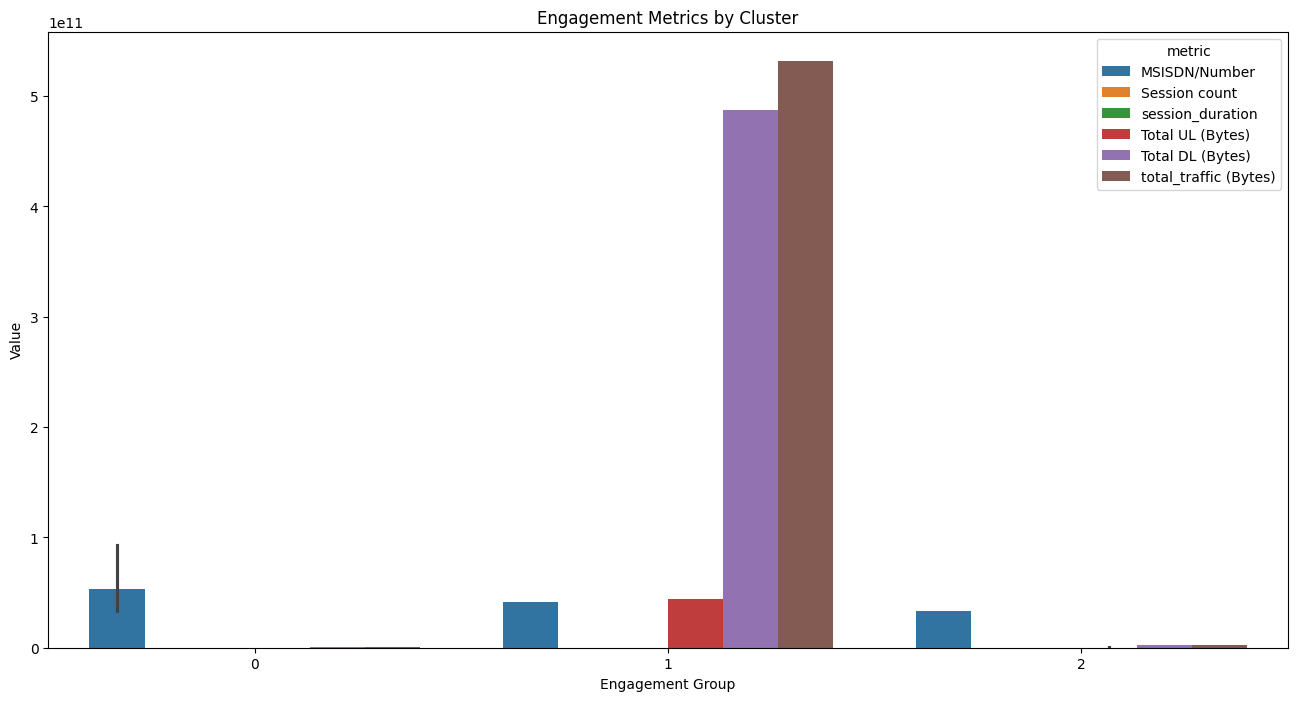

In [79]:
from scripts.aggregate import visualize_cluster_stats
cluster_stats = visualize_cluster_stats(kmean_data)

In [89]:
from scripts.aggregate import application_traffic
top_10_app_users=application_traffic(data)

top_10_app_users.head()

,MSISDN/Number,Netflix Total Traffic (Bytes),Application,Youtube Total Traffic (Bytes),Gaming Total Traffic (Bytes)
0,4.188282e+10,2.425357e+10,Netflix,NaN,NaN
1,3.365973e+10,3.434543e+08,Netflix,NaN,NaN
2,3.361489e+10,3.428638e+08,Netflix,NaN,NaN
3,3.376054e+10,3.346433e+08,Netflix,NaN,NaN
4,3.362578e+10,3.308437e+08,Netflix,NaN,NaN


In [92]:
from scripts.aggregate import top_10_users_per_app
top_10_users= top_10_users_per_app(data)
print(top_10_users)

{'Netflix':        MSISDN/Number  Netflix Total Traffic (Bytes)
62384   4.188282e+10                   7.276072e+10
18274   3.365973e+10                   1.030363e+09
2930    3.361489e+10                   1.028592e+09
48454   3.376054e+10                   1.003930e+09
5924    3.362578e+10                   9.925312e+08
48108   3.376041e+10                   9.550426e+08
33202   3.366716e+10                   9.418185e+08
61668   3.378632e+10                   9.178194e+08
50185   3.376127e+10                   8.762740e+08
39061   3.367588e+10                   8.091304e+08, 'Youtube':        MSISDN/Number  Youtube Total Traffic (Bytes)
62384   4.188282e+10                   7.302218e+10
5924    3.362578e+10                   1.238754e+09
48454   3.376054e+10                   1.188868e+09
2930    3.361489e+10                   1.088502e+09
33202   3.366716e+10                   9.456939e+08
48108   3.376041e+10                   9.095073e+08
43803   3.369879e+10                   9

Marking and visualizing the top 3 most used applications

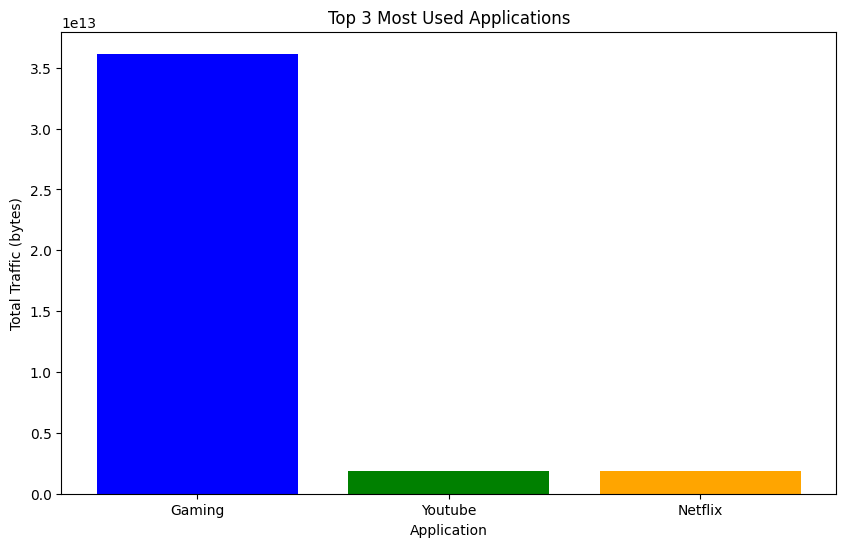

In [96]:
from scripts.aggregate import plot_top_3_apps
top_3_apps=plot_top_3_apps(data)

Analyze the Cluster Centroids

In [103]:
cluster_means = clusters.groupby('engagement group').mean().reset_index()
clusters_pd=pd.DataFrame(cluster_means)
clusters_pd.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_45044\2539532269.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  cluster_means = clusters.groupby('engagement group').mean().reset_index()


engagement group Session count                                \
                             min     max         mean      sum   
0                0           1.0     8.0     1.302915  80627.0   
1                1        1066.0  1066.0  1066.000000   1066.0   
2                2           1.0    16.0     4.736634   2392.0   

  session_duration                                            \
               min           max          mean           sum   
0     7.142000e+03  9.571120e+05  1.267410e+05  7.842985e+09   
1     7.255100e+07  7.255100e+07  7.255100e+07  7.255100e+07   
2     7.713580e+05  1.833709e+07  1.688216e+06  8.525493e+08   

  total_traffic (Bytes)                                            
                    min           max          mean           sum  
0          3.792924e+07  4.771967e+09  6.454024e+08  3.993879e+13  
1          5.317447e+11  5.317447e+11  5.317447e+11  5.317447e+11  
2          1.184873e+08  8.608279e+09  2.344165e+09  1.183803e+12

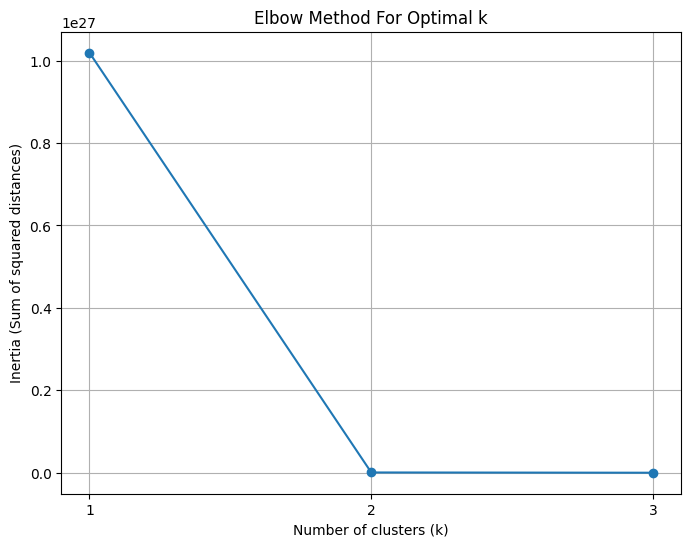

In [108]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Assuming 'data' is your DataFrame with relevant features
metrics = ['Session count', 'session_duration', 'total_traffic (Bytes)']
X = clusters[metrics]  # Data for clustering

# List to store inertia values
inertia = []

# Adjust the range based on the number of rows in your dataset
max_k = min(10, X.shape[0])  # Make sure k is not larger than the number of samples
for k in range(1, max_k+1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)  # Inertia is the sum of squared distances to the closest centroid

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, max_k+1), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Sum of squared distances)')
plt.xticks(np.arange(1, max_k+1, step=1))
plt.grid(True)
plt.show()


The plot of the inertia (sum of squared distances to the closest centroid) becomes a straight line after the second cluster, it suggests that increasing the number of clusters beyond 2 does not significantly improve the clustering or reduce the inertia.

Choosing k=2: Based on this observation, I can choose 𝑘=2 as the optimal number of clusters, since adding more clusters doesn't provide additional meaningful information.